# Assignment 2
## Submitted by: Arshad Ali(214102301)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import random

## 1

Change in reliability with hamming code 29.600000000000033%


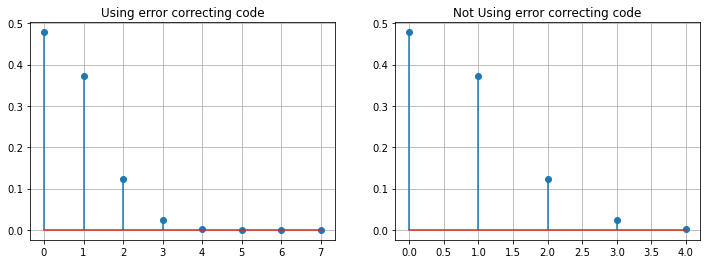

In [2]:
def binomial_dist(n,k,p):
    return (math.comb(n, k))*(p**k)*((1-p)**(n-k))

## Reliability
reliability_without_ham = binomial_dist(4,0,0.1)
reliability_with_ham = binomial_dist(7,0,0.1) + binomial_dist(7,1,0.1)
change_reliability = (reliability_with_ham - reliability_without_ham)/reliability_without_ham
print(f"Change in reliability with hamming code {change_reliability*100}%")



# Probability using error correcting code
# n=7 p=0.1
n1 = [i for i in range(8)]
x1 = [binomial_dist(7,i,0.1) for i in range(8)]

# Probability not using error correcting code
# n=4 p=0.1
n2 = [i for i in range(5)]
x2 = [binomial_dist(7,i,0.1) for i in range(5)]
    
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].stem(n1,x1)
axes[0].set_title("Using error correcting code")
axes[0].grid()

axes[1].stem(n2,x2)
axes[1].set_title("Not Using error correcting code")
axes[1].grid()

## 2

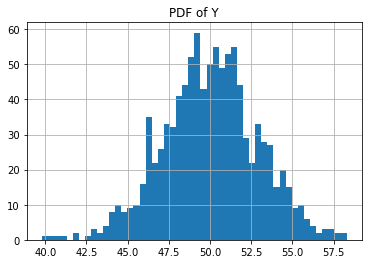

In [4]:
pdf = []
s = 0

for i in range(1000):
    x = np.random.uniform(0,1,100)
    s = np.sum(x)
    pdf.append(s)
    
    
plt.hist(pdf,50)
plt.title("PDF of Y")
plt.grid()

## 3

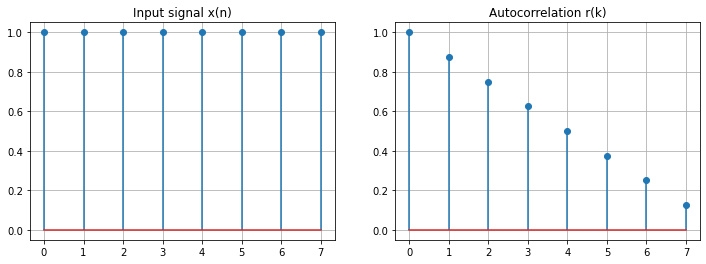

In [4]:
def autocorr(x):
    N = len(x)
    r = np.zeros(N)
    for k in range(N):
        for i in range(N):
            if(i-k<0):
                r[k] += (x[i]*x[i-k])/N
            else:
               
    return r

n = [i for i in range(8)]
x = [1 for i in range(8)]
r = autocorr(x)
 
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].stem(n,x)
axes[0].set_title("Input signal x(n)")
axes[0].grid()

axes[1].stem(n,r)
axes[1].set_title("Autocorrelation r(k)")
axes[1].grid()


## 4(a)

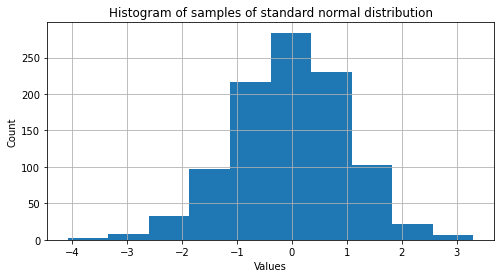

In [5]:
N = 1000
x = np.random.randn(N) # N samples from standard normal distribution


plt.figure(figsize=(8,4))
plt.hist(x)
plt.title("Histogram of samples of standard normal distribution")
plt.xlabel("Values")
plt.ylabel("Count")
plt.grid()


## 4(b)

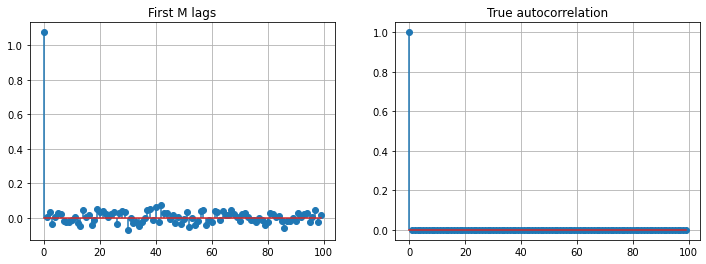

In [6]:
M = 100
r = autocorr(x)[0:M] # First M lags of autocorrelation
true_autocorr = [1] + [0 for i in range(M-1)]
n = [i for i in range(M)]

fig,axes = plt.subplots(1,2,figsize=(12,4))
axes[0].stem(n,r)
axes[0].set_title("First M lags")
axes[0].grid()

axes[1].stem(n,true_autocorr)
axes[1].set_title("True autocorrelation")
axes[1].grid()


## 4(c)

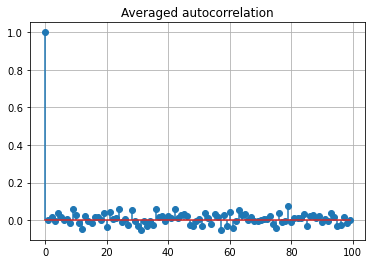

In [7]:
def averaged_autocorr(x,M=100):
    N = len(x)
    r = np.zeros(M)
    for k in range(M):
        for m in range(10): # 10 different samples
            for n in range(M):
                if(n-k+100*m<0):
                    r[k] += 0
                else:
                    r[k] += (x[n+100*m]*x[n-k+100*m])/N
    return r
    
x = np.random.randn(N)
M = 100
r_avg = averaged_autocorr(x)
true_autocorr = [1] + [0 for i in range(M-1)]
n = [i for i in range(M)]

plt.stem(n,r_avg)
plt.title("Averaged autocorrelation")
plt.grid()

## 4(d)

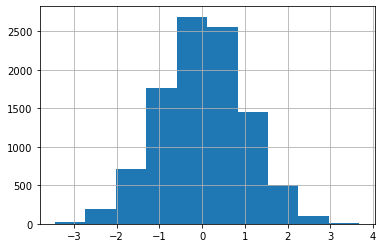

In [8]:
N = 10000
x = np.random.randn(N) # N samples from standard normal distribution

M = 100
r = autocorr(x)[0:M] # First M lags of autocorrelation
n = [i for i in range(M)]

plt.hist(x)
plt.grid()

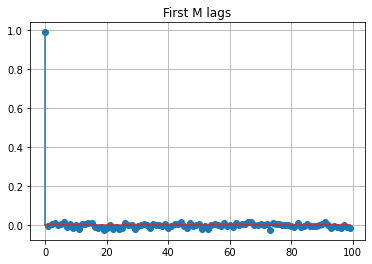

In [9]:
plt.stem(n,r)
plt.title("First M lags")
plt.grid()

When comparing the first M lags of autocorrelation between part(b) and part(d), we can say that as we have increased the sample size the autocorrelation becomes much closer to the true autocorrelation.

## 5

In [2]:
def correlation(x,y):
    num = sum((x - x.mean())*(y - y.mean()))
    den = sum((x-x.mean())**2)*sum((y-y.mean())**2)
    return num/np.sqrt(den)

def covariance(x,y):
    num = sum((x - x.mean())*(y - y.mean()))
    den = len(x)-1
    return num/den

In [11]:
df = pd.read_csv("Seed_Data.csv")
df.head()

,A,P,C,LK,WK,A_Coef,LKG,target
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0


In [12]:
feat1 = df.iloc[: , 0].values
feat2 = df.iloc[: , 1].values
feat3 = df.iloc[: , 2].values
feat4 = df.iloc[: , 3].values
feat5 = df.iloc[: , 4].values
feat6 = df.iloc[: , 5].values
feat7 = df.iloc[: , 6].values
feat = [feat1,feat2,feat3,feat4,feat5,feat6,feat7]

In [13]:
data = {'Correlation with user defined fn':[correlation(feat[0],feat[i]) for i in range(7)],
        'Covariance with user defined fn':[covariance(feat[0],feat[i]) for i in range(7)],
        'Correlation with numpy fn':[np.corrcoef(feat[0],feat[i])[0,1] for i in range(7)],
        'Covariance with numpy fn':[np.cov(feat[0],feat[i])[0,1] for i in range(7)],
       }
df1 = pd.DataFrame(data,index=[f"feat{i}" for i in range(1,8)])
print("For FEATURE1")
df1

For FEATURE1


,Correlation with user defined fn,Covariance with user defined fn,Correlation with numpy fn,Covariance with numpy fn
feat1,1.000000,8.466351,1.000000,8.466351
feat2,0.994341,3.778443,0.994341,3.778443
feat3,0.608288,0.041823,0.608288,0.041823
feat4,0.949985,1.224704,0.949985,1.224704
feat5,0.970771,1.066911,0.970771,1.066911
feat6,-0.229572,-1.004356,-0.229572,-1.004356
feat7,0.863693,1.235133,0.863693,1.235133


In [14]:
data = {'Correlation with user defined fn':[correlation(feat[1],feat[i]) for i in range(7)],
        'Covariance with user defined fn':[covariance(feat[1],feat[i]) for i in range(7)],
        'Correlation with numpy fn':[np.corrcoef(feat[1],feat[i])[0,1] for i in range(7)],
        'Covariance with numpy fn':[np.cov(feat[1],feat[i])[0,1] for i in range(7)],
       }
df2 = pd.DataFrame(data,index=[f"feat{i}" for i in range(1,8)])
print("For FEATURE2")
df2

For FEATURE2


,Correlation with user defined fn,Covariance with user defined fn,Correlation with numpy fn,Covariance with numpy fn
feat1,0.994341,3.778443,0.994341,3.778443
feat2,1.000000,1.705528,1.000000,1.705528
feat3,0.529244,0.016332,0.529244,0.016332
feat4,0.972422,0.562666,0.972422,0.562666
feat5,0.944829,0.466065,0.944829,0.466065
feat6,-0.217340,-0.426766,-0.217340,-0.426766
feat7,0.890784,0.571753,0.890784,0.571753


In [15]:
data = {'Correlation with user defined fn':[correlation(feat[2],feat[i]) for i in range(7)],
        'Covariance with user defined fn':[covariance(feat[2],feat[i]) for i in range(7)],
        'Correlation with numpy fn':[np.corrcoef(feat[2],feat[i])[0,1] for i in range(7)],
        'Covariance with numpy fn':[np.cov(feat[2],feat[i])[0,1] for i in range(7)],
       }
df3 = pd.DataFrame(data,index=[f"feat{i}" for i in range(1,8)])
print("For FEATURE3")
df3

For FEATURE3


,Correlation with user defined fn,Covariance with user defined fn,Correlation with numpy fn,Covariance with numpy fn
feat1,0.608288,0.041823,0.608288,0.041823
feat2,0.529244,0.016332,0.529244,0.016332
feat3,1.000000,0.000558,1.000000,0.000558
feat4,0.367915,0.003852,0.367915,0.003852
feat5,0.761635,0.006798,0.761635,0.006798
feat6,-0.331471,-0.011777,-0.331471,-0.011777
feat7,0.226825,0.002634,0.226825,0.002634


In [16]:
data = {'Correlation with user defined fn':[correlation(feat[3],feat[i]) for i in range(7)],
        'Covariance with user defined fn':[covariance(feat[3],feat[i]) for i in range(7)],
        'Correlation with numpy fn':[np.corrcoef(feat[3],feat[i])[0,1] for i in range(7)],
        'Covariance with numpy fn':[np.cov(feat[3],feat[i])[0,1] for i in range(7)],
       }
df4 = pd.DataFrame(data,index=[f"feat{i}" for i in range(1,8)])
print("For FEATURE4")
df4

For FEATURE4


,Correlation with user defined fn,Covariance with user defined fn,Correlation with numpy fn,Covariance with numpy fn
feat1,0.949985,1.224704,0.949985,1.224704
feat2,0.972422,0.562666,0.972422,0.562666
feat3,0.367915,0.003852,0.367915,0.003852
feat4,1.000000,0.196305,1.000000,0.196305
feat5,0.860415,0.143992,0.860415,0.143992
feat6,-0.171562,-0.114290,-0.171562,-0.114290
feat7,0.932806,0.203125,0.932806,0.203125


In [17]:
data = {'Correlation with user defined fn':[correlation(feat[4],feat[i]) for i in range(7)],
        'Covariance with user defined fn':[covariance(feat[4],feat[i]) for i in range(7)],
        'Correlation with numpy fn':[np.corrcoef(feat[4],feat[i])[0,1] for i in range(7)],
        'Covariance with numpy fn':[np.cov(feat[4],feat[i])[0,1] for i in range(7)],
       }
df5 = pd.DataFrame(data,index=[f"feat{i}" for i in range(1,8)])
print("For FEATURE5")
df5

For FEATURE5


,Correlation with user defined fn,Covariance with user defined fn,Correlation with numpy fn,Covariance with numpy fn
feat1,0.970771,1.066911,0.970771,1.066911
feat2,0.944829,0.466065,0.944829,0.466065
feat3,0.761635,0.006798,0.761635,0.006798
feat4,0.860415,0.143992,0.860415,0.143992
feat5,1.000000,0.142668,1.000000,0.142668
feat6,-0.258037,-0.146543,-0.258037,-0.146543
feat7,0.749131,0.139068,0.749131,0.139068


In [18]:
data = {'Correlation with user defined fn':[correlation(feat[5],feat[i]) for i in range(7)],
        'Covariance with user defined fn':[covariance(feat[5],feat[i]) for i in range(7)],
        'Correlation with numpy fn':[np.corrcoef(feat[5],feat[i])[0,1] for i in range(7)],
        'Covariance with numpy fn':[np.cov(feat[5],feat[i])[0,1] for i in range(7)],
       }
df6 = pd.DataFrame(data,index=[f"feat{i}" for i in range(1,8)])
print("For FEATURE6")
df6

For FEATURE6


,Correlation with user defined fn,Covariance with user defined fn,Correlation with numpy fn,Covariance with numpy fn
feat1,-0.229572,-1.004356,-0.229572,-1.004356
feat2,-0.217340,-0.426766,-0.217340,-0.426766
feat3,-0.331471,-0.011777,-0.331471,-0.011777
feat4,-0.171562,-0.114290,-0.171562,-0.114290
feat5,-0.258037,-0.146543,-0.258037,-0.146543
feat6,1.000000,2.260684,1.000000,2.260684
feat7,-0.011079,-0.008187,-0.011079,-0.008187


In [19]:
data = {'Correlation with user defined fn':[correlation(feat[6],feat[i]) for i in range(7)],
        'Covariance with user defined fn':[covariance(feat[6],feat[i]) for i in range(7)],
        'Correlation with numpy fn':[np.corrcoef(feat[6],feat[i])[0,1] for i in range(7)],
        'Covariance with numpy fn':[np.cov(feat[6],feat[i])[0,1] for i in range(7)],
       }
df7 = pd.DataFrame(data,index=[f"feat{i}" for i in range(1,8)])
print("For FEATURE7")
df7

For FEATURE7


,Correlation with user defined fn,Covariance with user defined fn,Correlation with numpy fn,Covariance with numpy fn
feat1,0.863693,1.235133,0.863693,1.235133
feat2,0.890784,0.571753,0.890784,0.571753
feat3,0.226825,0.002634,0.226825,0.002634
feat4,0.932806,0.203125,0.932806,0.203125
feat5,0.749131,0.139068,0.749131,0.139068
feat6,-0.011079,-0.008187,-0.011079,-0.008187
feat7,1.000000,0.241553,1.000000,0.241553


## 6(a)


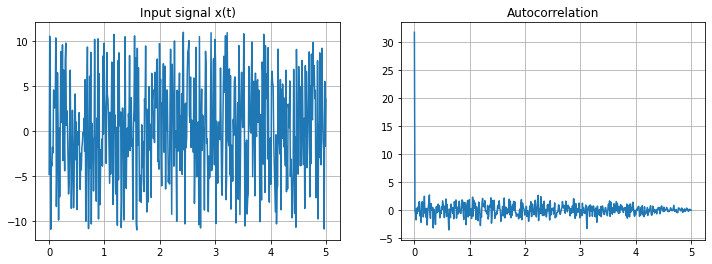

In [31]:
def x_t(t,phi1,phi2):
    return 5*np.sin(2*t+phi1) + 6*np.sin(3*t+phi2)

def autocorr(x):
    N = len(x)
    r = np.zeros(N)
    for k in range(N):
        for i in range(N):
            if(i-k<0):
                r[k] += 0
            else:
                r[k] += (x[i]*x[i-k])/N
    return r

phi1 = np.linspace(-np.pi,np.pi)
phi2 = np.linspace(0,2*np.pi)
t = np.linspace(0,5,500)
x = [x_t(i,random.choice(phi1),random.choice(phi2)) for i in t]
#x = [x_t(i,-np.pi/2,np.pi/2) for i in t]
r = autocorr(x)

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].plot(t,x)
axes[0].set_title("Input signal x(t)")
axes[0].grid()

axes[1].plot(t,r)
axes[1].set_title("Autocorrelation")
axes[1].grid()


## 6(b)

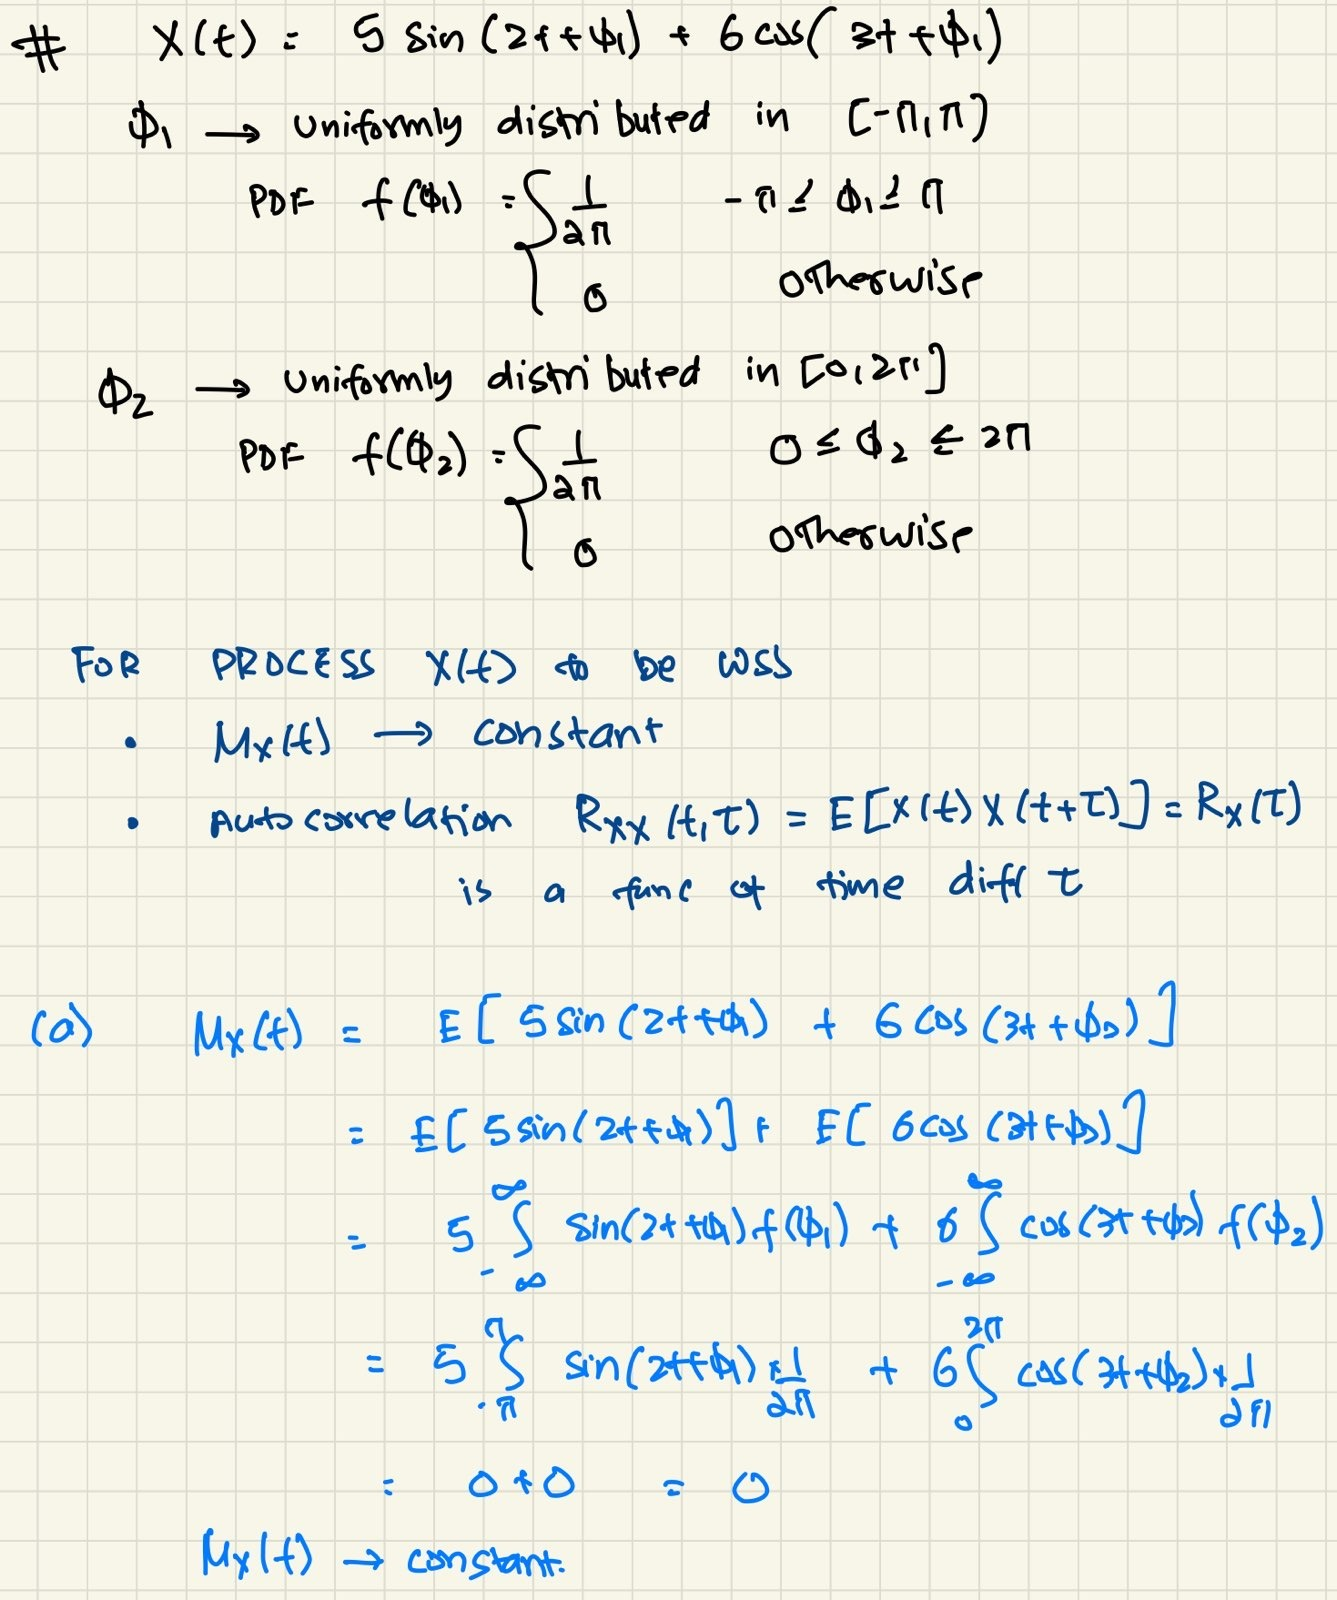

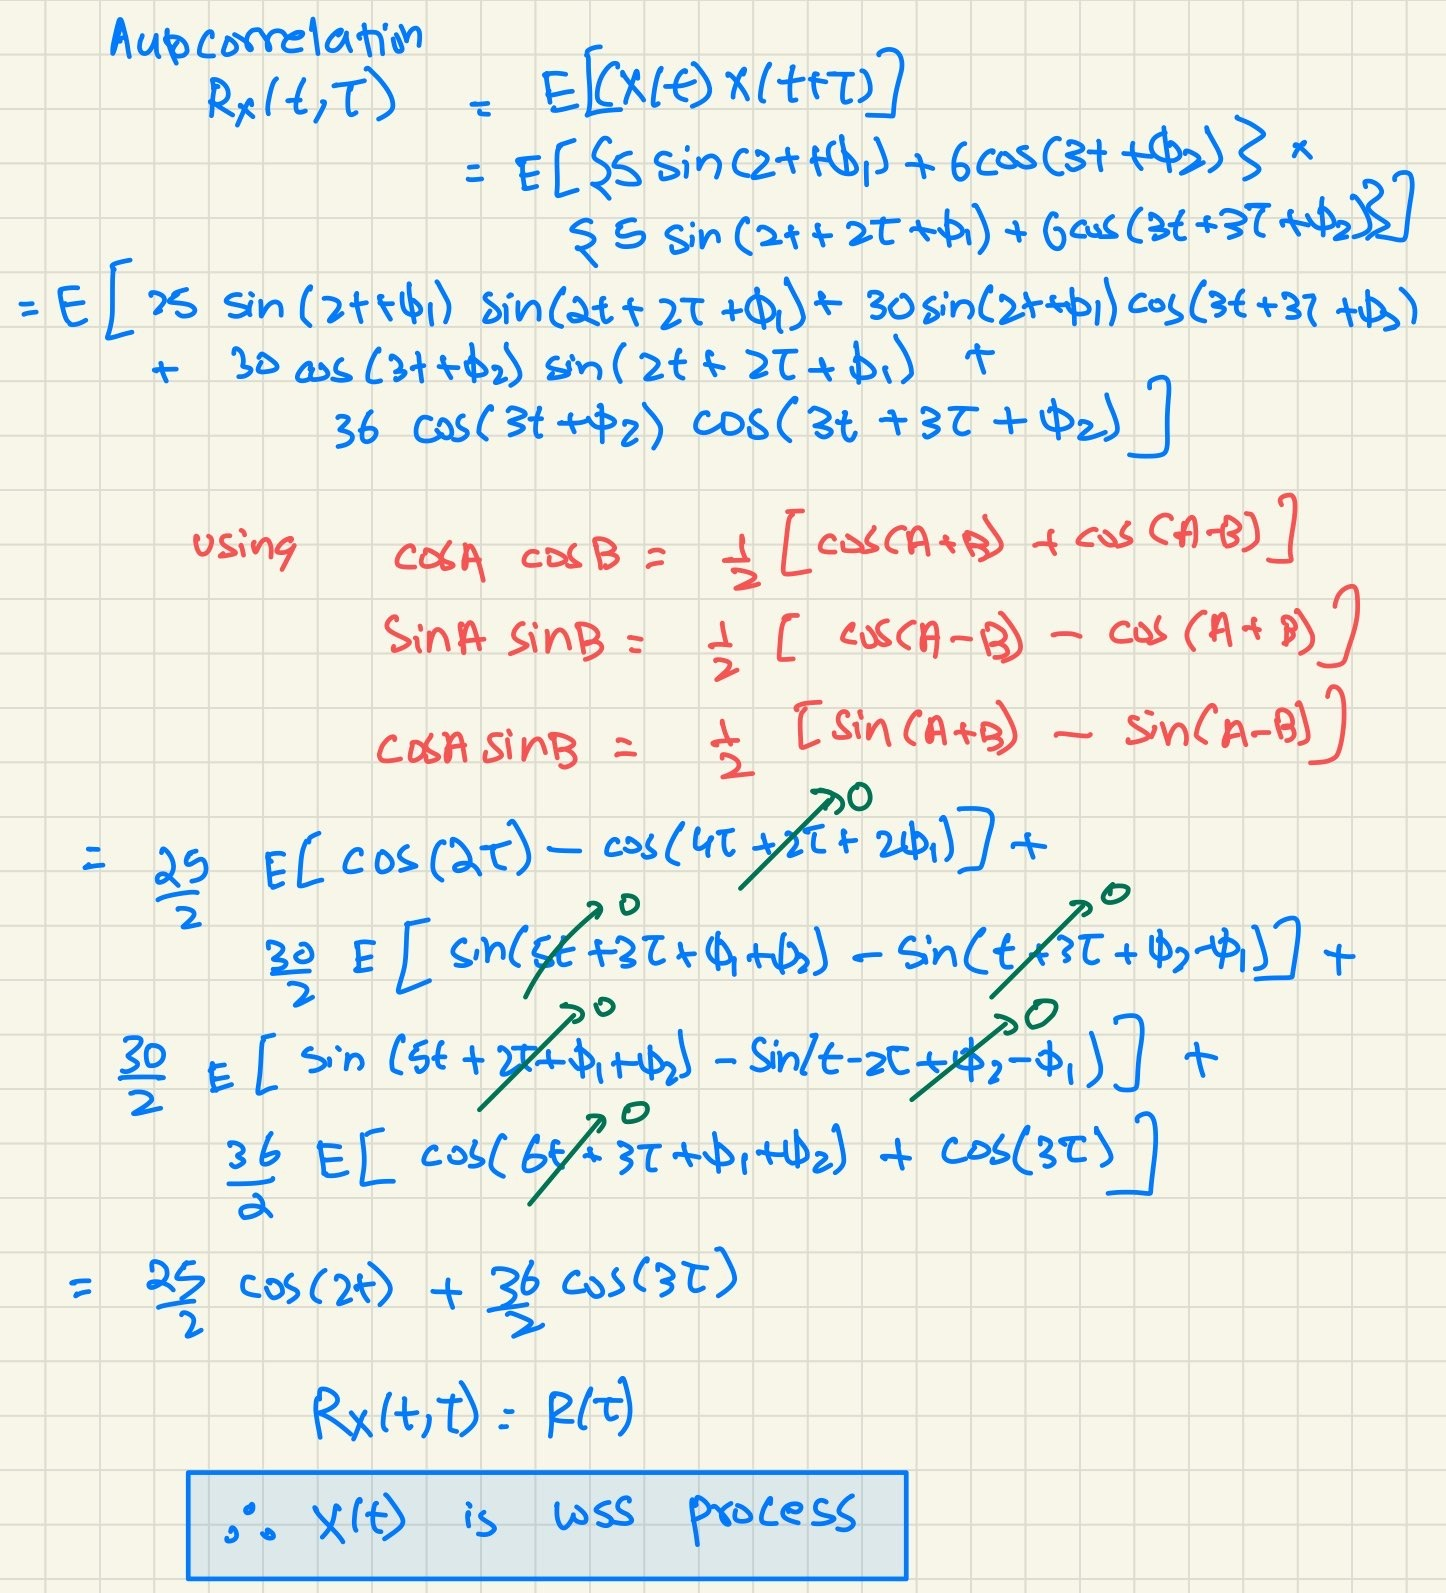

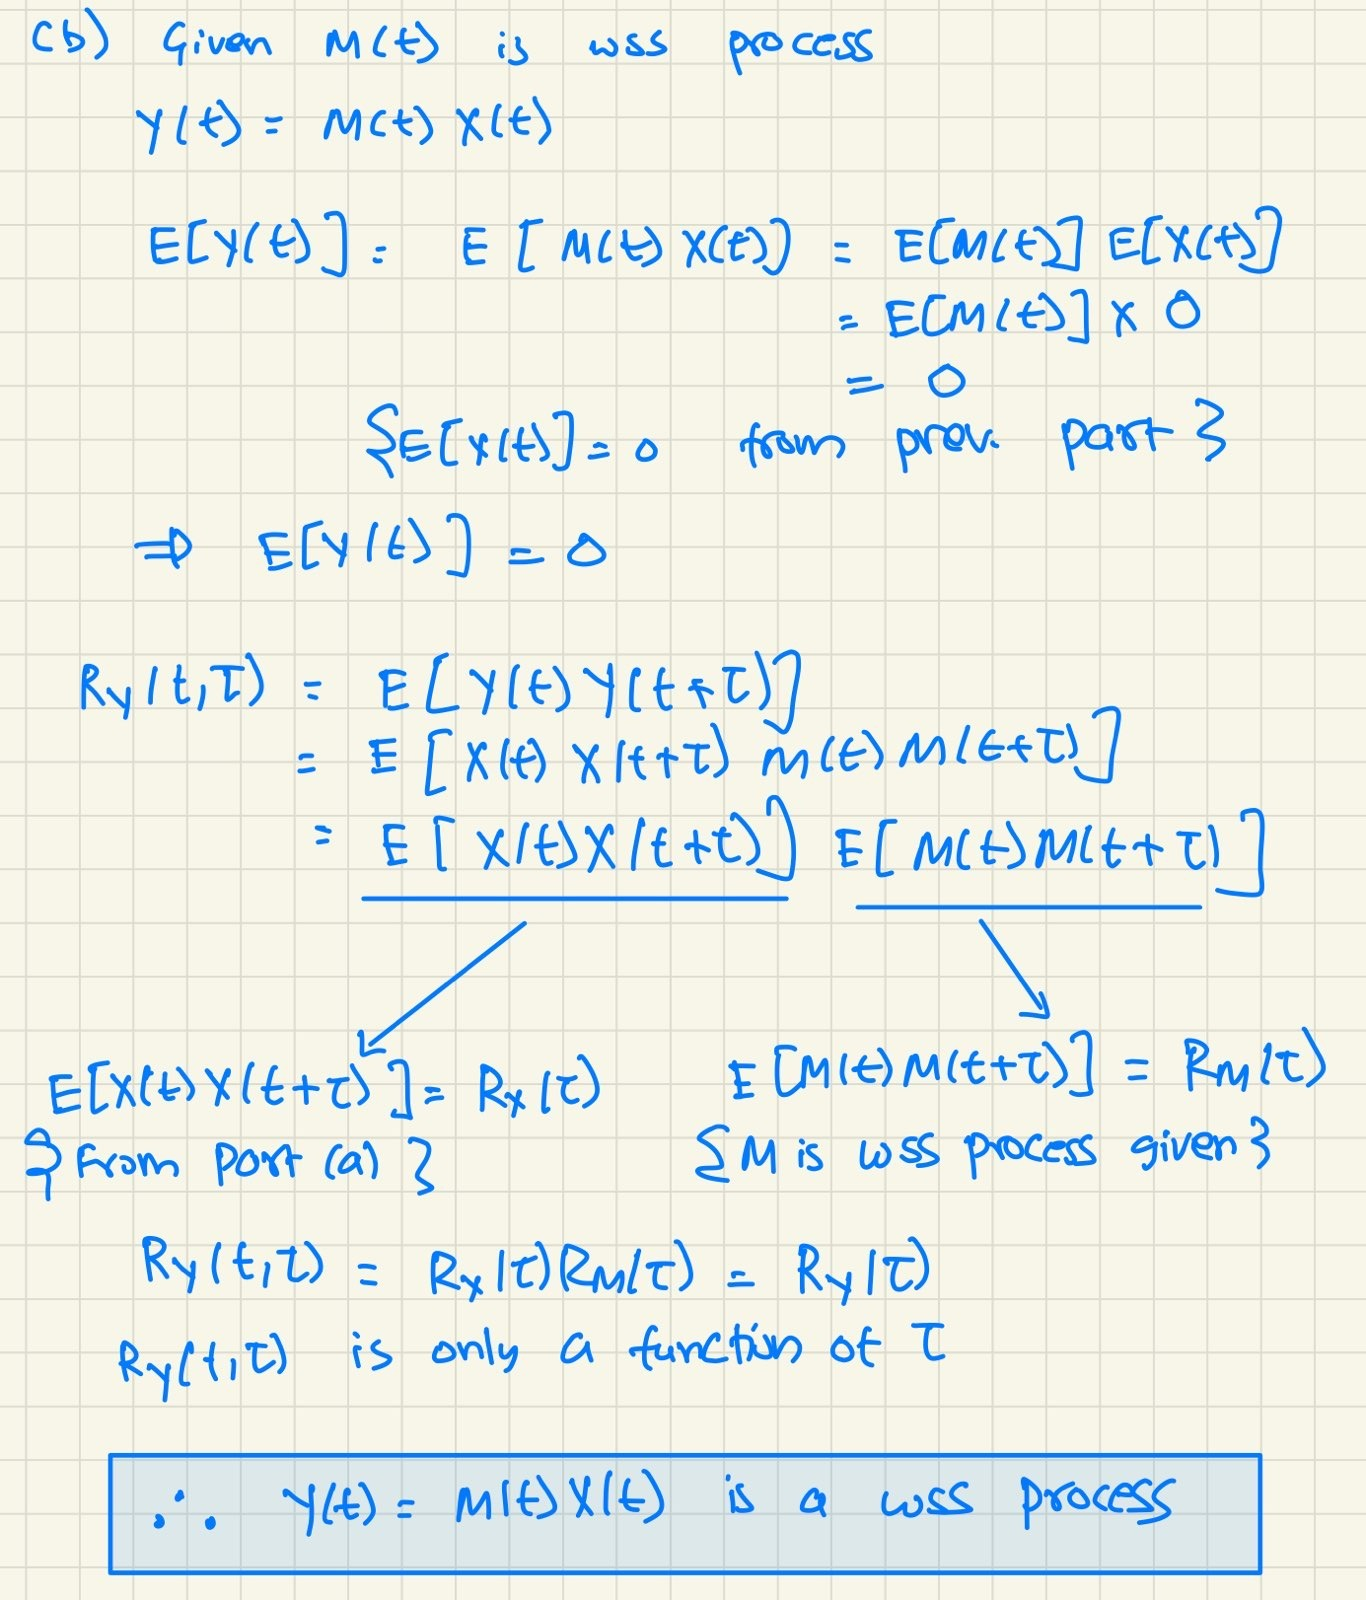

## 7(a)

In [21]:
np.random.chisquare(df=2, size=(2,3))

array([[2.72782207, 2.78173593, 0.80908301],
       [8.31465248, 1.42994318, 1.60704962]])

## 7(b)

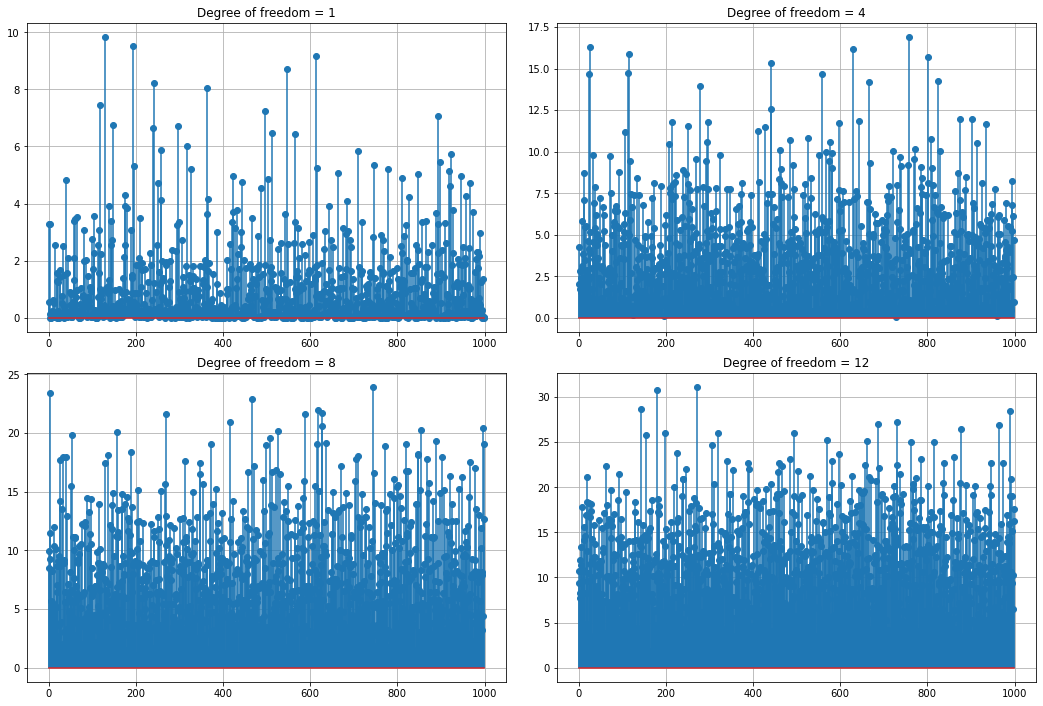

In [22]:
dof = [1,4,8,12]
x1 = np.random.chisquare(df=1, size=1000)
x2 = np.random.chisquare(df=4, size=1000)
x3 = np.random.chisquare(df=8, size=1000)
x4 = np.random.chisquare(df=12, size=1000)
n = [i for i in range(1000)]

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
plt.tight_layout(pad=2)
axes[0][0].stem(n,x1)
axes[0][0].set_title("Degree of freedom = 1")
axes[0][0].grid()

axes[0][1].stem(n,x2)
axes[0][1].set_title("Degree of freedom = 4")
axes[0][1].grid()

axes[1][0].stem(n,x3)
axes[1][0].set_title("Degree of freedom = 8")
axes[1][0].grid()

axes[1][1].stem(n,x4)
axes[1][1].set_title("Degree of freedom = 12")
axes[1][1].grid()


## 8(a)

In [23]:
np.random.exponential(scale=2, size=(2,3))

array([[0.11754632, 0.51300472, 1.52515685],
       [1.43409733, 0.39317986, 0.29866178]])

## 8(b)

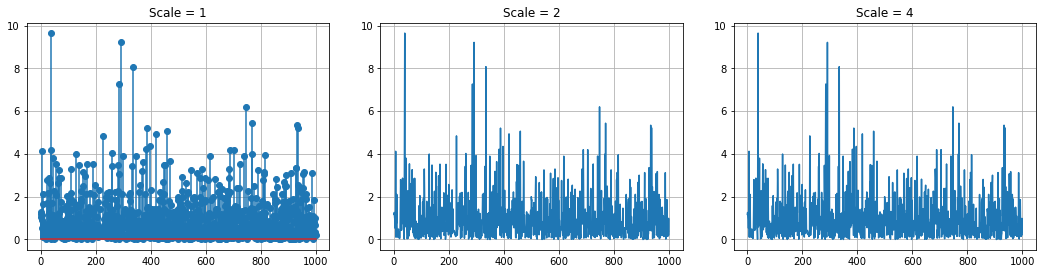

In [6]:
n = [i for i in range(1000)]

x1 = np.random.exponential(scale=1, size=1000)
x2 = np.random.exponential(scale=2, size=1000)
x3 = np.random.exponential(scale=4, size=1000)

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
plt.tight_layout(pad=2)
axes[0].stem(n,x1)
axes[0].set_title("Scale = 1")
axes[0].grid()

axes[1].plot(n,x1)
axes[1].set_title("Scale = 2")
axes[1].grid()

axes[2].plot(n,x1)
axes[2].set_title("Scale = 4")
axes[2].grid()


## 9(a)

In [6]:
# P(2)=0.1, P(4)=0.3, P(6)=0.6, P(8)=0
N = 100
n_2 = 10 # 0.1*100
n_4 = 30 # 0.3*100
n_6 = 60 # 0.6*100
n_8 = 0

x = [2 for i in range(n_2)] + [4 for i in range(n_4)] + [6 for i in range(n_6)]

values = [2,4,6,8]
prob = [0.1,0.3,0.6,0]
np.random.choice(values,100,prob)


array([8, 2, 2, 8, 8, 8, 4, 2, 6, 2, 6, 2, 8, 8, 4, 6, 2, 4, 8, 8, 4, 6,
       6, 4, 2, 4, 2, 6, 8, 8, 8, 8, 4, 6, 6, 2, 8, 2, 6, 2, 8, 6, 4, 2,
       4, 2, 2, 8, 4, 2, 6, 8, 4, 6, 8, 6, 8, 2, 6, 4, 4, 8, 4, 4, 6, 8,
       8, 2, 6, 6, 6, 4, 4, 8, 8, 6, 6, 2, 6, 8, 8, 2, 8, 8, 4, 8, 2, 8,
       8, 4, 2, 4, 8, 4, 6, 8, 6, 8, 8, 6])

## 9(b)

In [12]:
import random

arr = np.zeros((3,5))
for i in range(3):
    for j in range(5):
        idx = random.randint(0,99) # random number between 0 and 99
        arr[i][j] = x[idx]
print(arr)

[[4. 2. 4. 6. 2.]
 [6. 4. 6. 6. 6.]
 [6. 6. 2. 6. 6.]]


## 10(a)

<ipython-input-27-5855f10ca2be>:2: RuntimeWarning: divide by zero encountered in double_scalars
  pdf = x**((k/2)-1)*math.exp(-x/2)/((2**(k/2))*(math.gamma(k/2)))


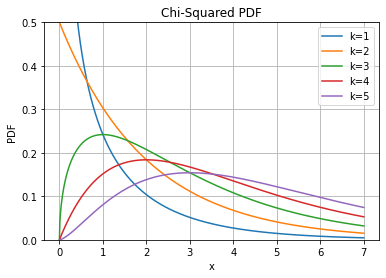

In [27]:
def chiSquared_pdf(x,k):
    pdf = x**((k/2)-1)*math.exp(-x/2)/((2**(k/2))*(math.gamma(k/2)))
    return pdf

x = np.linspace(0,7,700)

K = [1,2,3,4,5]
for k in K:
    
    pdf = [chiSquared_pdf(i,k) for i in x]
    plt.plot(x,pdf,label=f"k={k}")
    plt.ylim(0,0.5)
    
plt.xlabel("x")
plt.ylabel("PDF")
plt.title("Chi-Squared PDF")
plt.grid()
plt.legend()

## 10(b)

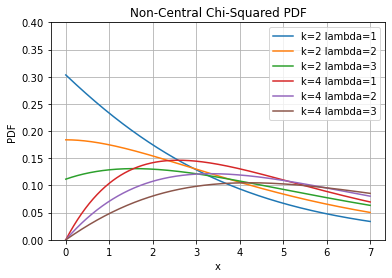

In [28]:
from scipy.special import iv

def nonCentralChi(x,l,k):
    pdf = 0.5 * np.exp(-0.5 * (x + l)) * np.power(x/l , (k/4 - 0.5)) * iv( 0.5*k-1 , np.sqrt(l*x) )
    return pdf
 
    
x = np.linspace(0,7,700)
K = [2,4]  
lam = [1,2,3]
for k in K:
    for l in lam:
        pdf = [nonCentralChi(i,l,k) for i in x]
        plt.plot(x,pdf,label=f"k={k} lambda={l}")
        plt.ylim(0,1)

plt.xlabel("x")
plt.ylabel("PDF")
plt.ylim(0,0.4)
plt.title("Non-Central Chi-Squared PDF")
plt.grid()
plt.legend()
